In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import radar, norm_df

In [2]:
df = pd.read_pickle('2.0combined_stats.pkl')

new_index = [name.replace('_10yrs', '') for name in df.index]
df.index=new_index

In [3]:
name_dict = {'best18k parallax  HealpixSlicer': 'parallax',
            'best18k properMotion  HealpixSlicer': 'proper motion',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 5_10 days UserPointsSlicer': 'fast microlensing',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': 'slow microlensing',
            'fONv MedianNvis fO  HealpixSlicer': 'fO N vis',
            'DifferentialCompleteness H = 16.000000 Discovery_N_Chances NEO 3 pairs in 15 nights trailing loss MoObjSlicer': 'NEO bright',
            'DifferentialCompleteness H = 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights trailing loss MoObjSlicer': 'NEO faint',
            'DifferentialCompleteness H = 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights trailing loss MoObjSlicer': 'TNO',
             'Total detected SNNSNMetric_nSN  HealpixSlicer': 'SNe',
            #'Total detected TDE_Quality__some_color_pnum  UserPointsSlicer': 'TDE',
            '3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer': '3x2',
            'Median WeakLensingNvisits i band non-DD HealpixSlicer': 'WL',
            'Sum PrestoKNe__scoreS  UserPointsSlicer': 'Transients, KNe',}
invert_cols = ['parallax', 'proper motion']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = df[key]

mag_name_dict = {}
for filtername in 'ugrizy':
    mag_name_dict['Mean CoaddM5 %s HealpixSlicer' % filtername] = filtername

mag_data = pd.DataFrame()
for key in mag_name_dict:
    mag_data[mag_name_dict[key]] = df[key]

In [4]:
df

metric,Length of Survey (days),"NChanges filter, observationStartMJD",OpenShutterFraction,tEff,Number of Exposures,Sum SkySaturation,Slew Count All visits,Mean slewTime All visits,Median slewTime All visits,Min slewTime All visits,...,"Counts_ToO, 89_t8","Counts_ToO, 95_t0","Counts_ToO, 95_t1","Counts_ToO, 95_t2","Counts_ToO, 95_t4","Counts_ToO, 96_t0","Counts_ToO, 96_t1","Counts_ToO, 96_t2","Counts_ToO, 96_t4","Counts_ToO, 96_t8"
baseline_retrofoot_v2.0,3652.104322,34678.0,0.722316,0.588588,2086534.0,0.0,2086534.0,7.728750,4.832924,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baseline_v2.0,3652.104333,34812.0,0.722458,0.569799,2086980.0,0.0,2086980.0,7.718367,4.824469,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bluer_indx0_v2.0,3652.104250,34488.0,0.722881,0.568914,2088051.0,0.0,2088051.0,7.692650,4.824003,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bluer_indx1_v2.0,3652.104303,34491.0,0.723220,0.571559,2089107.0,0.0,2089107.0,7.697270,4.824258,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carina_v2.0,3652.104419,30852.0,0.722543,0.565177,2087222.0,0.0,2087222.0,7.714250,4.832211,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vary_nes_nesfrac0.50_v2.0,3652.104304,34714.0,0.722805,0.562693,2087928.0,0.0,2087928.0,7.692723,4.819081,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vary_nes_nesfrac0.55_v2.0,3652.104066,34901.0,0.722719,0.560747,2087662.0,0.0,2087662.0,7.695154,4.818339,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vary_nes_nesfrac0.75_v2.0,3652.104485,34940.0,0.722869,0.552520,2088056.0,0.0,2088056.0,7.678876,4.813409,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vary_nes_nesfrac1.00_v2.0,3652.104415,34916.0,0.723237,0.538319,2089159.0,0.0,2089159.0,7.643005,4.804873,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns[1000]

'CumulativeCompleteness@Time@H=18.00 H <=18.0 @ 61373.83 Discovery_Time Trojan 3 pairs in 15 nights detection loss MoObjSlicer'

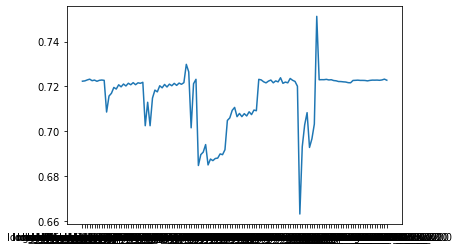

In [6]:
plt.plot(df['OpenShutterFraction'])

In [7]:
df['OpenShutterFraction'].values.max()

0.7512253546069011

In [8]:
[ack for ack in df.columns if 'SNN' in ack]

['Median SNNSNMetric_nSN  HealpixSlicer',
 'Mean SNNSNMetric_nSN  HealpixSlicer',
 'Total detected SNNSNMetric_nSN  HealpixSlicer',
 'Total on sky SNNSNMetric_nSN  HealpixSlicer',
 'Median SNNSNMetric_zlim  HealpixSlicer',
 'Mean SNNSNMetric_zlim  HealpixSlicer',
 'Total detected SNNSNMetric_zlim  HealpixSlicer',
 'Total on sky SNNSNMetric_zlim  HealpixSlicer']

In [9]:
runs = [run for run in df.index if 'baseline' in run]

Text(0, 0.5, 'N SNe')

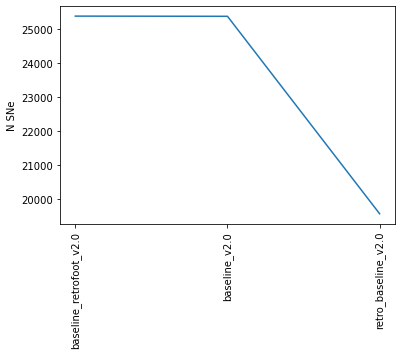

In [10]:
# Turning on rolling gives a big boost in SNe
fig, ax = plt.subplots()
ax.plot(df['Total detected SNNSNMetric_nSN  HealpixSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('N SNe')

In [11]:

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


In [12]:
ndata

,parallax,proper motion,fast microlensing,slow microlensing,fO N vis,NEO bright,NEO faint,TNO,SNe,3x2,WL,"Transients, KNe"
baseline_retrofoot_v2.0,1.025425,1.042678,0.298734,0.481793,1.042908,0.995913,0.991552,0.973765,1.000218,0.896675,1.037634,0.994413
baseline_v2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
retro_baseline_v2.0,0.983502,1.041805,0.243671,0.357843,1.010727,0.978060,1.003168,0.982099,0.770948,0.913416,1.000000,0.871508


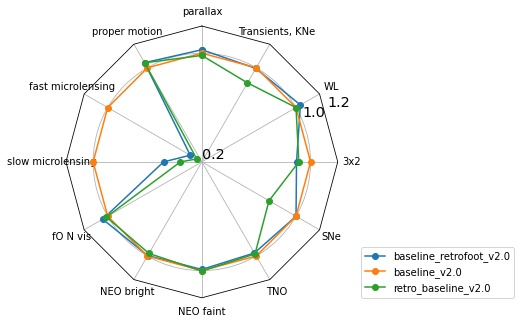

In [13]:


fig, ax = radar(ndata, legend=True, rgrids=[0.2, 1.0, 1.2], bbox_to_anchor=(1.65, 0))
fig.savefig('baseline2_radar.pdf', bbox_inches="tight")

Text(0, 0.5, 'MBA')

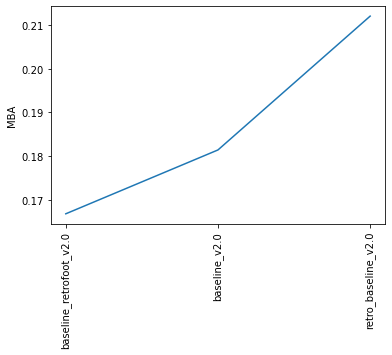

In [14]:
mba = 'DifferentialCompleteness H = 21.000000 Discovery_N_Chances MBA 3 pairs in 15 nights trailing loss MoObjSlicer'
fig, ax = plt.subplots()
ax.plot(df[mba][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('MBA')

In [15]:
df[mba][runs]

baseline_retrofoot_v2.0    0.166833
baseline_v2.0              0.181436
retro_baseline_v2.0        0.212042
Name: DifferentialCompleteness H = 21.000000 Discovery_N_Chances MBA 3 pairs in 15 nights trailing loss MoObjSlicer, dtype: float64

In [16]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'blue' in run]

In [17]:
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


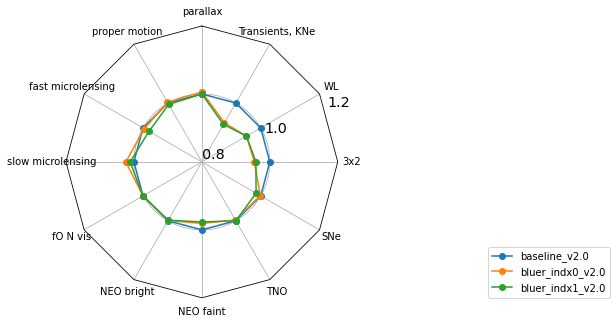

In [18]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


In [19]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_u' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


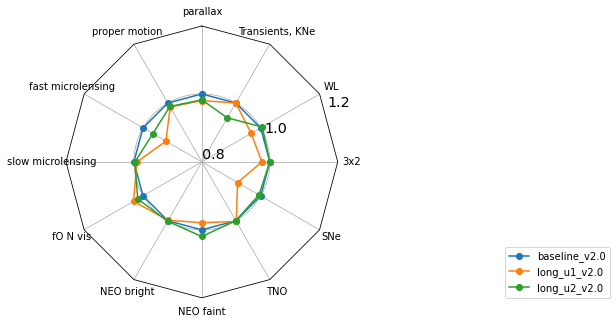

In [20]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


In [21]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'rolling_ns' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


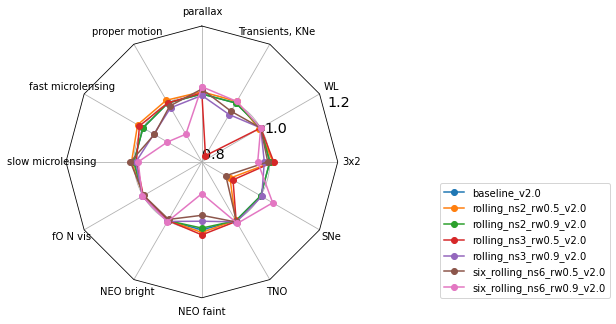

In [22]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


In [23]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'roll_' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


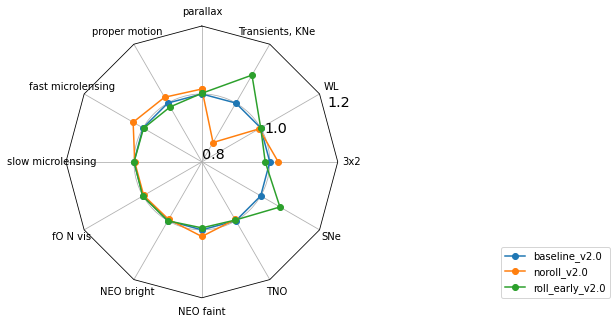

In [24]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


In [25]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'rolling_bul' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


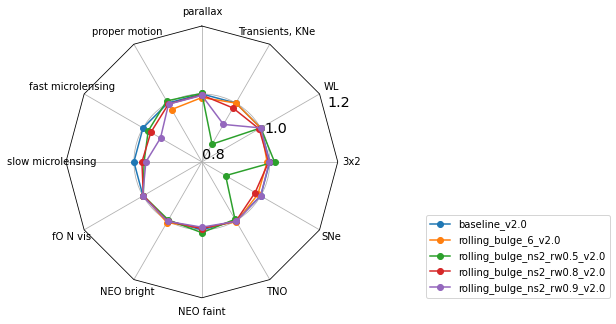

In [26]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


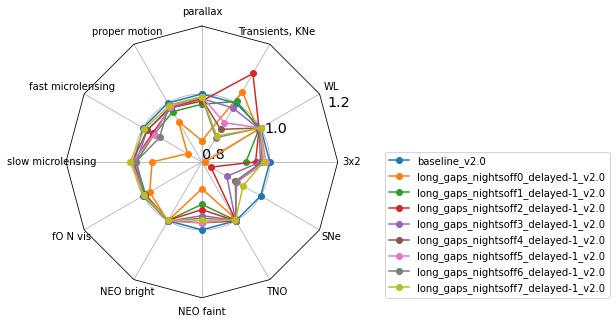

In [27]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_gaps_night' in run and '-1' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


Text(0, 0.5, 'Transient Score')

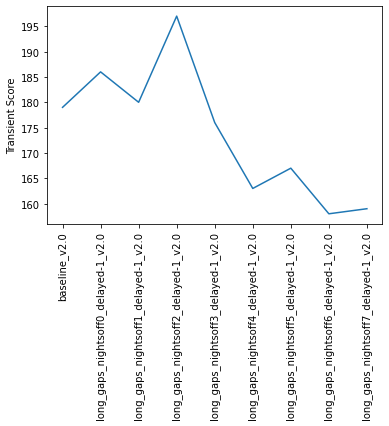

In [28]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

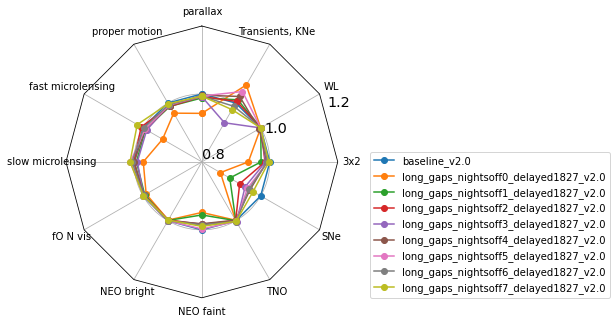

In [29]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_gaps_night' in run and '18' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


Text(0, 0.5, 'Transient Score')

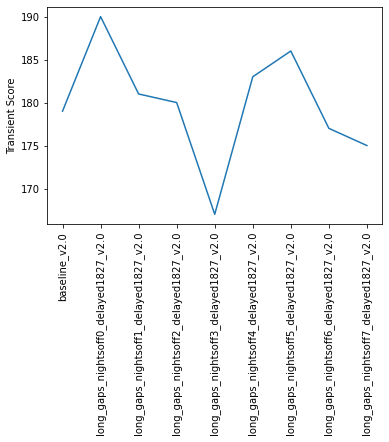

In [30]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

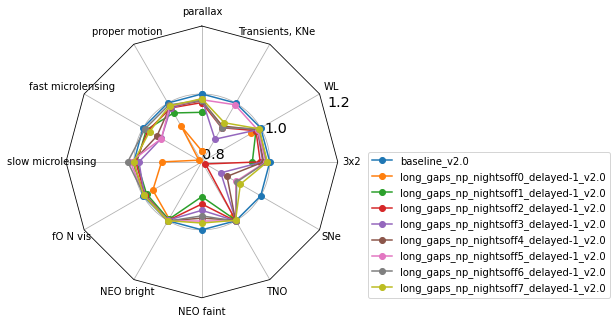

In [31]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_gaps_np' in run and '-1' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


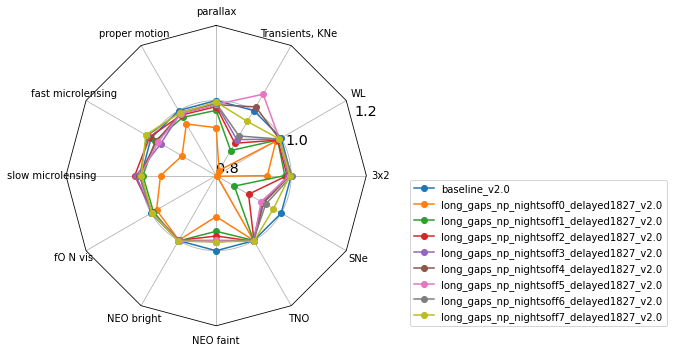

In [32]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_gaps_np' in run and '18' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

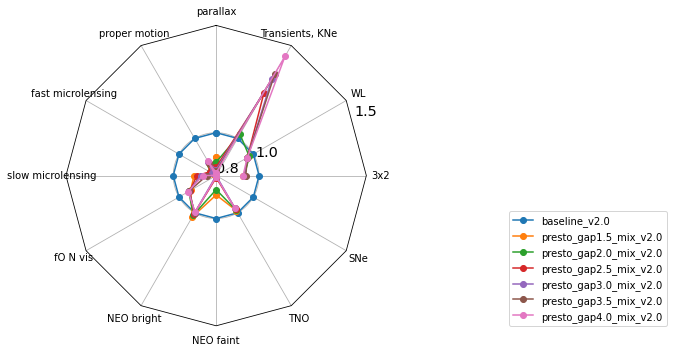

In [33]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_gap' in run and 'mix' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.5], bbox_to_anchor=(2, 0))
fig.tight_layout()

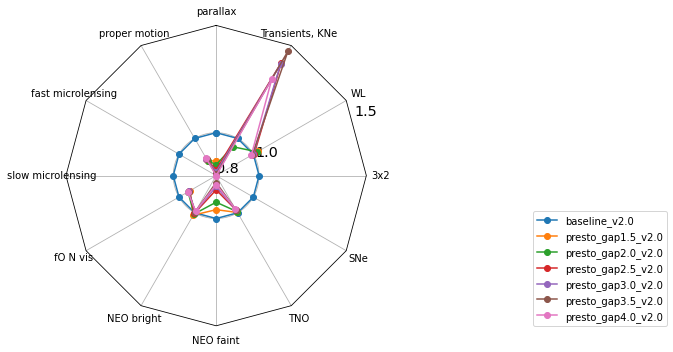

In [34]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_gap' in run and 'mix' not in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.5], bbox_to_anchor=(2, 0))
fig.tight_layout()

Text(0, 0.5, 'Transient Score')

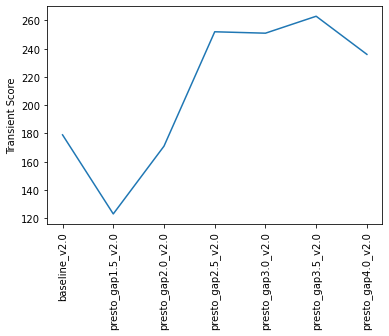

In [35]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

Text(0, 0.5, 'Transient Score')

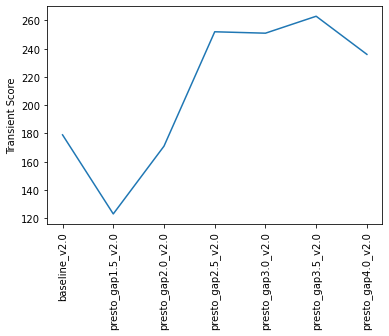

In [36]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

Text(0, 0.5, 'N SNe')

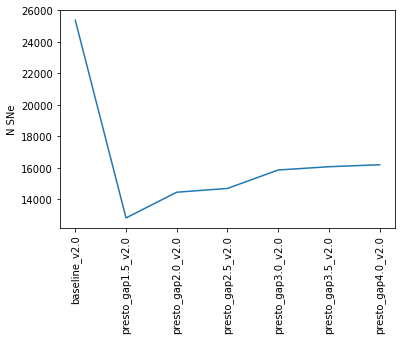

In [37]:
fig, ax = plt.subplots()
ax.plot(df['Total detected SNNSNMetric_nSN  HealpixSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('N SNe')

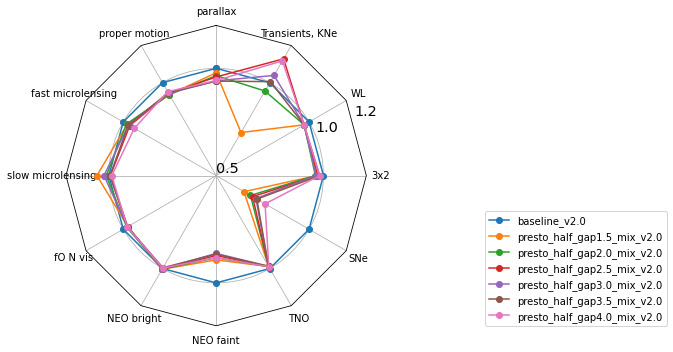

In [38]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_half' in run and 'mix' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

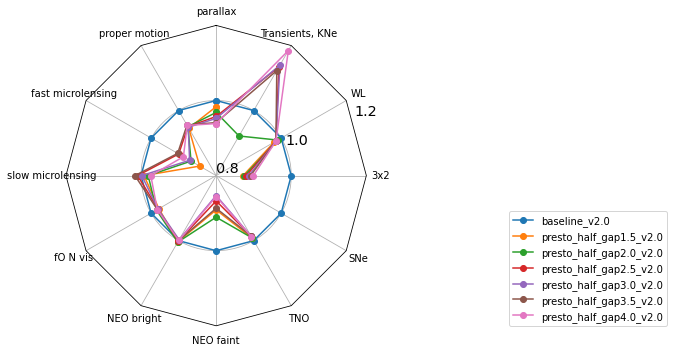

In [39]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_half' in run and 'mix' not in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

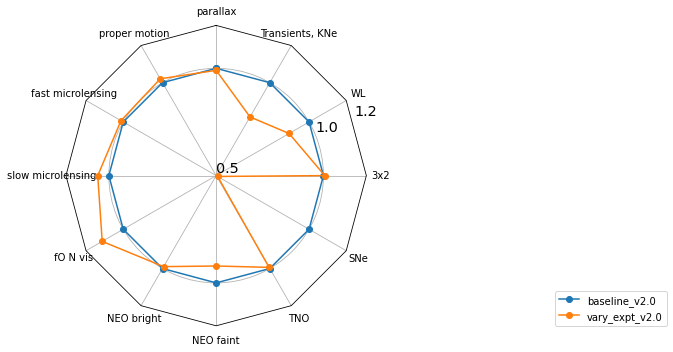

In [40]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_expt' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

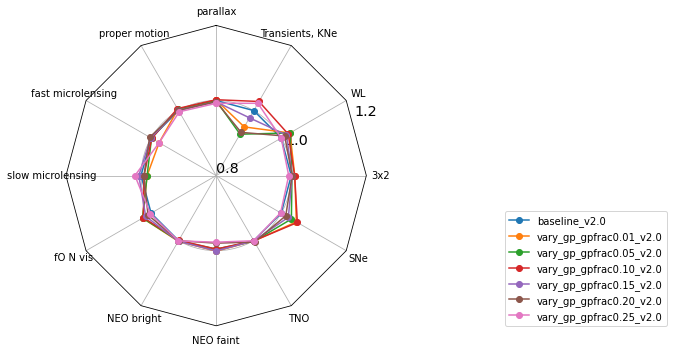

In [41]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_gp' in run] 
ndata = norm_df(data, runs[0:7], cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

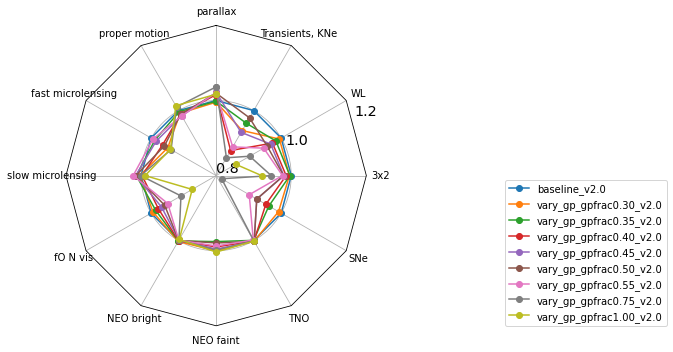

In [42]:

ndata = norm_df(data, [runs[0]] + runs[7:], cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

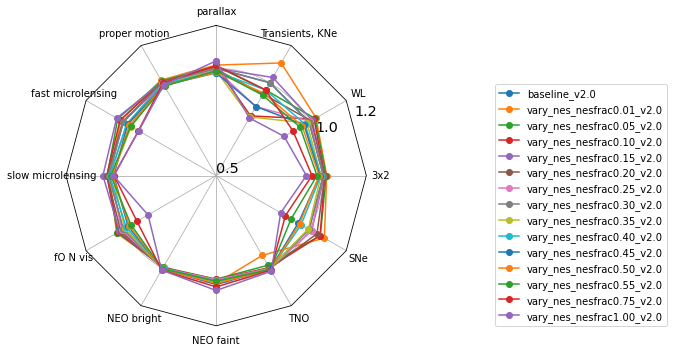

In [43]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_nes' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

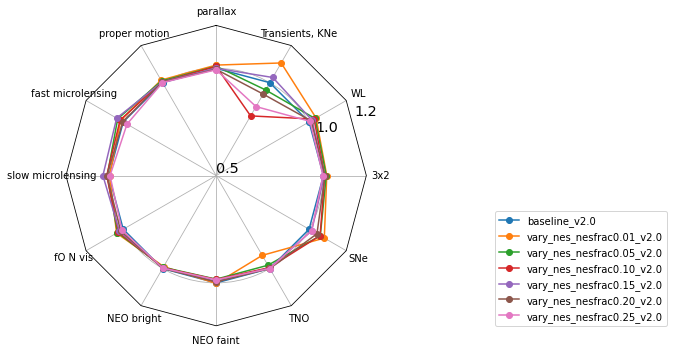

In [44]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_nes' in run] 
ndata = norm_df(data, runs[0:7], cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

In [45]:
data.loc[runs]

,parallax,proper motion,fast microlensing,slow microlensing,fO N vis,NEO bright,NEO faint,TNO,SNe,3x2,WL,"Transients, KNe"
baseline_v2.0,0.791058,0.184088,0.1580,0.4284,839.0,0.9298,0.3788,0.6480,25374.969,37.908126,186.0,179.0
vary_nes_nesfrac0.01_v2.0,0.779332,0.181547,0.1602,0.4270,869.0,0.9202,0.3798,0.6022,27458.520,38.495324,193.0,198.0
vary_nes_nesfrac0.05_v2.0,0.783293,0.182412,0.1627,0.4317,865.0,0.9238,0.3722,0.6366,26907.677,38.407499,192.0,172.0
vary_nes_nesfrac0.10_v2.0,0.784105,0.183385,0.1607,0.4327,861.0,0.9256,0.3728,0.6448,26880.965,38.134552,191.0,147.0
vary_nes_nesfrac0.15_v2.0,0.790765,0.183389,0.1636,0.4403,856.0,0.9262,0.3762,0.6464,25730.967,38.067924,189.0,184.0
vary_nes_nesfrac0.20_v2.0,0.794694,0.183417,0.1583,0.4323,851.0,0.9290,0.3772,0.6478,26452.062,38.183515,188.0,168.0
vary_nes_nesfrac0.25_v2.0,0.796469,0.184024,0.1548,0.4261,845.0,0.9282,0.3732,0.6480,25718.026,37.833131,187.0,156.0
vary_nes_nesfrac0.30_v2.0,0.791058,0.184088,0.1580,0.4284,839.0,0.9296,0.3768,0.6480,25374.969,37.908126,186.0,179.0
vary_nes_nesfrac0.35_v2.0,0.800042,0.185509,0.1513,0.4215,832.0,0.9310,0.3778,0.6484,25279.688,37.482975,184.0,146.0
vary_nes_nesfrac0.40_v2.0,0.803523,0.185504,0.1551,0.4270,825.0,0.9296,0.3756,0.6516,24296.872,37.440052,182.0,172.0


Text(0, 0.5, 'OCC_r5, H=16')

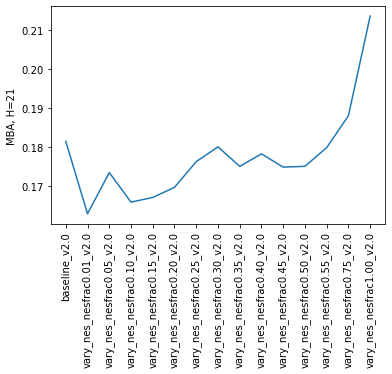

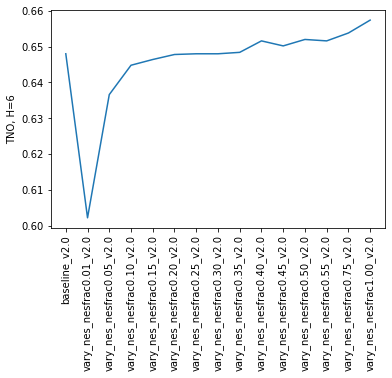

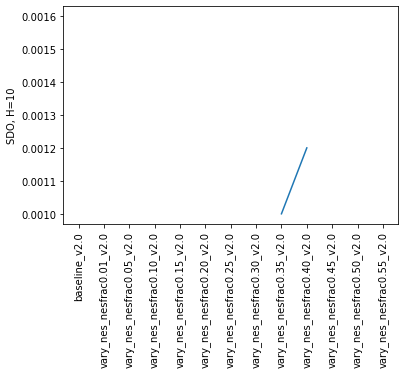

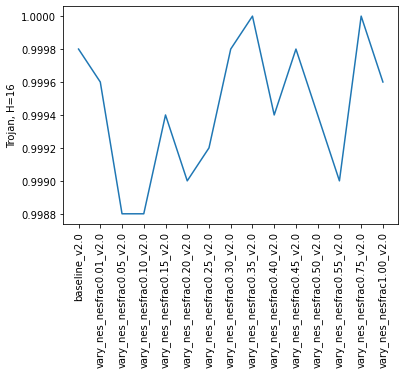

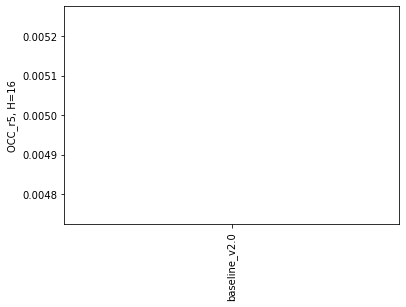

In [46]:
fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 21.000000 Discovery_N_Chances MBA 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('MBA, H=21')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('TNO, H=6')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 10.000000 Discovery_N_Chances SDO 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('SDO, H=10')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 16.000000 Discovery_N_Chances Trojan 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Trojan, H=16')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 16.000000 Discovery_N_Chances OCC_r20 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('OCC_r5, H=16')

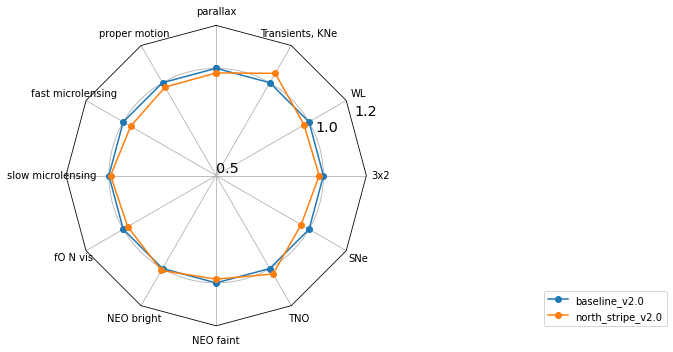

In [47]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'north' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

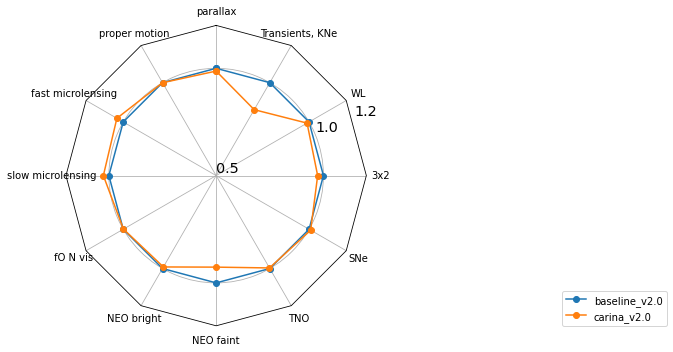

In [48]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'carina' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

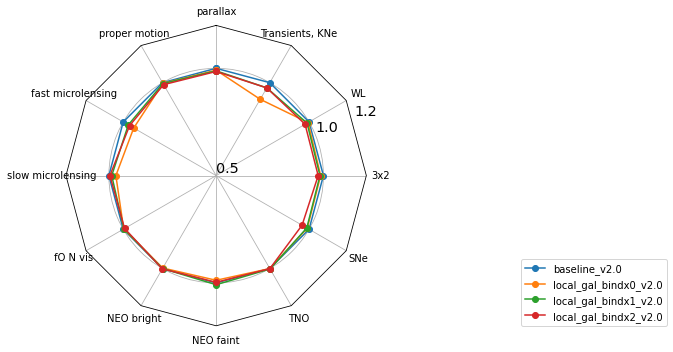

In [49]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'local' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

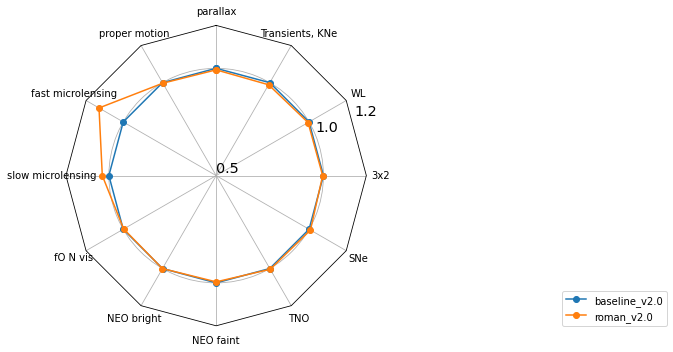

In [50]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'roman' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

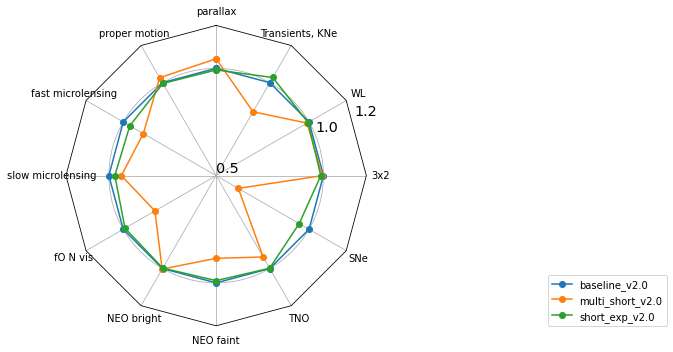

In [51]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'short' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

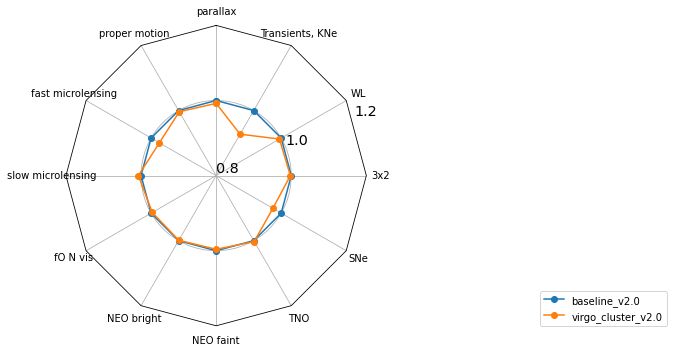

In [52]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'virgo' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

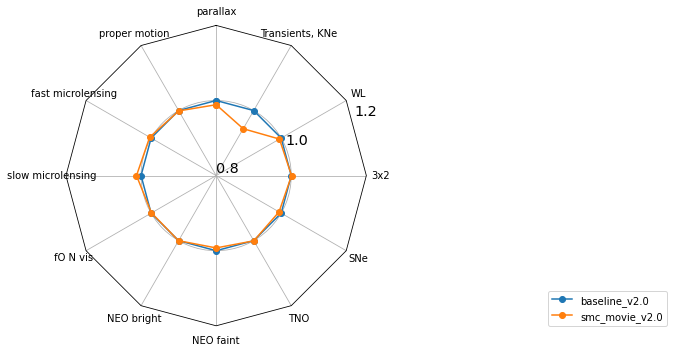

In [53]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'smc' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

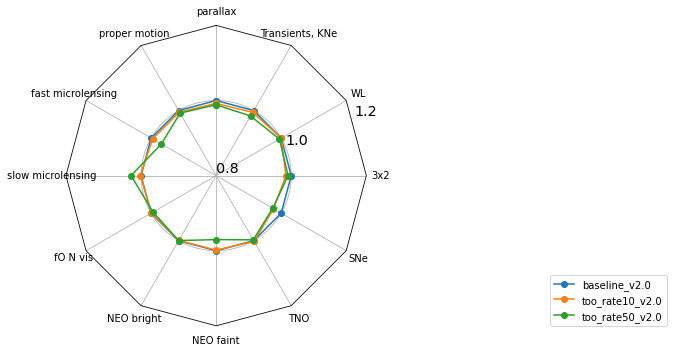

In [54]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'too' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

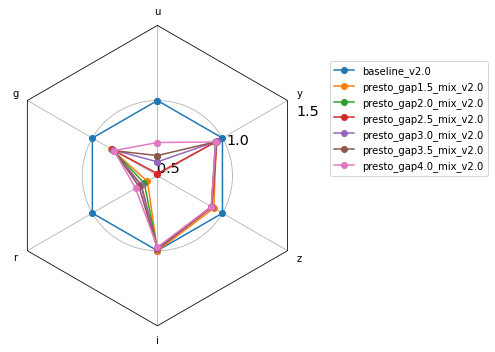

In [55]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_gap' in run and 'mix' in run] 

data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.50, 1.0, 1.5], alpha=.1)
fig.tight_layout()

In [56]:
mag_data.loc[runs]

,u,g,r,i,z,y
baseline_v2.0,25.673322,26.646327,26.554576,25.996892,25.273748,24.514211
presto_gap1.5_mix_v2.0,24.889814,26.503189,26.130855,25.998083,25.207494,24.467516
presto_gap2.0_mix_v2.0,25.074557,26.491052,26.155565,25.987157,25.188992,24.459939
presto_gap2.5_mix_v2.0,25.186227,26.495363,26.177886,25.988047,25.193103,24.471747
presto_gap3.0_mix_v2.0,25.265191,26.490114,26.182638,25.986900,25.190029,24.469238
presto_gap3.5_mix_v2.0,25.306900,26.477498,26.197561,25.981994,25.189143,24.465063
presto_gap4.0_mix_v2.0,25.393480,26.479592,26.222633,25.973529,25.186957,24.462711


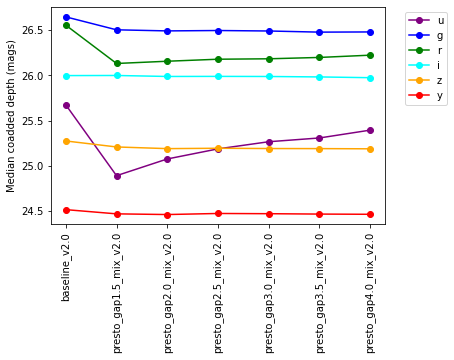

In [57]:
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
fig, ax = plt.subplots()
for filtername in 'ugrizy':
    ax.plot(mag_data.loc[runs][filtername], label=filtername, color=f2c[filtername], marker='o')
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Median coadded depth (mags)')
ax.legend(bbox_to_anchor=(1.2, 1.0))

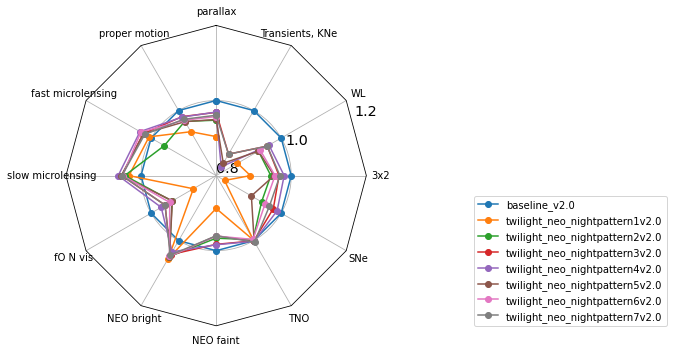

In [58]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'twili' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

In [59]:
data.loc[runs]

,parallax,proper motion,fast microlensing,slow microlensing,fO N vis,NEO bright,NEO faint,TNO,SNe,3x2,WL,"Transients, KNe"
baseline_v2.0,0.791058,0.184088,0.1580,0.4284,839.0,0.9298,0.3788,0.6480,25374.969,37.908126,186.0,179.0
twilight_neo_nightpattern1v2.0,0.875151,0.196896,0.1590,0.4422,730.0,0.9810,0.3362,0.6468,20953.825,33.789185,161.0,138.0
twilight_neo_nightpattern2v2.0,0.834827,0.190420,0.1516,0.4470,785.0,0.9752,0.3662,0.6460,23844.679,35.845149,173.0,139.0
twilight_neo_nightpattern3v2.0,0.816851,0.187588,0.1618,0.4504,803.0,0.9696,0.3724,0.6484,24760.890,36.676457,178.0,155.0
twilight_neo_nightpattern4v2.0,0.816124,0.187829,0.1634,0.4545,813.0,0.9618,0.3728,0.6492,25056.156,37.191955,179.0,148.0
twilight_neo_nightpattern5v2.0,0.833112,0.190596,0.1617,0.4509,784.0,0.9756,0.3638,0.6496,23049.196,36.176128,173.0,150.0
twilight_neo_nightpattern6v2.0,0.826466,0.189733,0.1630,0.4494,791.0,0.9750,0.3640,0.6456,24115.741,36.272295,174.0,141.0
twilight_neo_nightpattern7v2.0,0.823417,0.189163,0.1611,0.4502,803.0,0.9714,0.3638,0.6508,24451.653,36.768819,178.0,155.0


In [60]:
data.loc[runs].to_latex()

'\\begin{tabular}{lrrrrrrrrrrrr}\n\\toprule\n{} &  parallax &  proper motion &  fast microlensing &  slow microlensing &  fO N vis &  NEO bright &  NEO faint &     TNO &        SNe &        3x2 &     WL &  Transients, KNe \\\\\n\\midrule\nbaseline\\_v2.0                  &  0.791058 &       0.184088 &             0.1580 &             0.4284 &     839.0 &      0.9298 &     0.3788 &  0.6480 &  25374.969 &  37.908126 &  186.0 &            179.0 \\\\\ntwilight\\_neo\\_nightpattern1v2.0 &  0.875151 &       0.196896 &             0.1590 &             0.4422 &     730.0 &      0.9810 &     0.3362 &  0.6468 &  20953.825 &  33.789185 &  161.0 &            138.0 \\\\\ntwilight\\_neo\\_nightpattern2v2.0 &  0.834827 &       0.190420 &             0.1516 &             0.4470 &     785.0 &      0.9752 &     0.3662 &  0.6460 &  23844.679 &  35.845149 &  173.0 &            139.0 \\\\\ntwilight\\_neo\\_nightpattern3v2.0 &  0.816851 &       0.187588 &             0.1618 &             0.4504 &     803.0 

In [61]:
df['DifferentialCompleteness H = 17.000000 Discovery_N_Chances Trojan 3 pairs in 15 nights trailing loss MoObjSlicer']

baseline_retrofoot_v2.0      0.5070
baseline_v2.0                0.5154
bluer_indx0_v2.0             0.4844
bluer_indx1_v2.0             0.4538
carina_v2.0                  0.4864
                              ...  
vary_nes_nesfrac0.50_v2.0    0.4770
vary_nes_nesfrac0.55_v2.0    0.4856
vary_nes_nesfrac0.75_v2.0    0.5112
vary_nes_nesfrac1.00_v2.0    0.6228
virgo_cluster_v2.0           0.4694
Name: DifferentialCompleteness H = 17.000000 Discovery_N_Chances Trojan 3 pairs in 15 nights trailing loss MoObjSlicer, Length: 127, dtype: float64

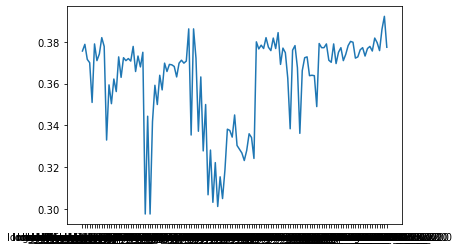

In [62]:
plt.plot(df['DifferentialCompleteness H = 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights trailing loss MoObjSlicer'])